SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 05 - Intensity transformations II

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the libraries
---

In [1]:
import numpy as np

from skimage import util, color, exposure

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### %matplotlib notebook
SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

## Loading an input image

In [2]:
img_gray = plt.imread('./images/boat.tif')

# Print some information about the image
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


* Lists with the intensity values

In [3]:
# 8-bit unsigned integer
r = np.array(np.linspace(0, 255, 256))

# Float
r_ = np.array(np.linspace(0, 1, 256))

## Generating images with different characteristics

In [4]:
# BRIGHT IMAGE
# ============
# Sets the gamma value
gama_02 = 0.2
# Gamma transformation
img_gray_bright = util.img_as_ubyte(util.img_as_float(img_gray) ** gama_02)
# Transformation function (for plotting)
s_clara = r_ ** gama_02 * 255

# DARK IMAGE
# ==============
# Sets the gamma value
gama_40 = 4.0
# Gamma transformation
img_gray_dark = util.img_as_ubyte(util.img_as_float(img_gray) ** gama_40)
# Transformation function (for plotting)
s_escura = r_ ** gama_40 * 255

# LOW CONTRAST IMAGE
# =========================
# Linear transformation
img_gray_low = (img_gray * 0.25 + 95).astype(np.uint8)
# Transformation function (for plotting)
s_baixo = r * 0.25 + 95

* Printing information about the images

In [5]:
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())
print(img_gray_bright.shape, img_gray_bright.dtype, img_gray_bright.min(), img_gray_bright.max())
print(img_gray_dark.shape, img_gray_dark.dtype, img_gray_dark.min(), img_gray_dark.max())
print(img_gray_low.shape, img_gray_low.dtype, img_gray_low.min(), img_gray_low.max())

(512, 512) uint8 0 239
(512, 512) uint8 0 252
(512, 512) uint8 0 197
(512, 512) uint8 95 154


### Plotting the images

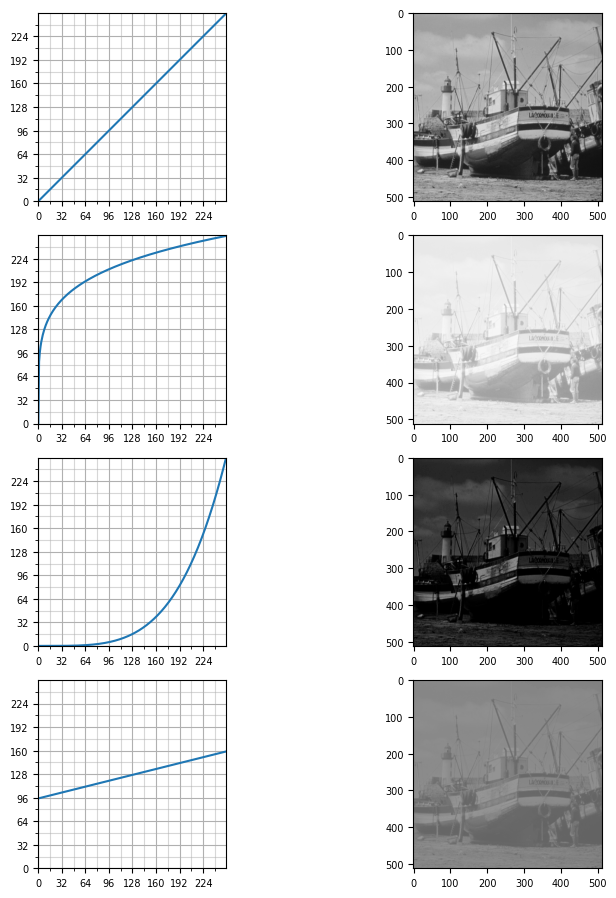

In [6]:
s_list = [r, s_clara, s_escura, s_baixo]
img_list = [img_gray, img_gray_bright, img_gray_dark, img_gray_low]

fig, ax  = plt.subplots(4, 2, figsize=(9, 9))
for i, s in enumerate(s_list):
    ch_ = ax[i,0].plot(r, s)

    ax[i,0].autoscale(enable=True, axis='both', tight=True)
    ### ax[i] = fig.gca()
    ax[i,0].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i,0].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i,0].set_yticks(np.arange(0, 256, 32), minor=False)
    ax[i,0].set_yticks(np.arange(0, 256, 16), minor=True)
    ax[i,0].set_aspect('equal')
    ax[i,0].grid(which='major', alpha=1.0)
    ax[i,0].grid(which='minor', alpha=0.5)
    ax[i,0].set_ylim(0, 256)
    
    im_ = ax[i,1].imshow(img_list[i], cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.show()

## Contrast stretching (scikit-image)
---

* From the maximum and minimum values in each image.

In [7]:
img_alarg_list = []

for img in img_list:
    # https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity
    img_alarg = exposure.rescale_intensity(img)    
    
    img_alarg_list.append(img_alarg)

### Plotting the images and histograms

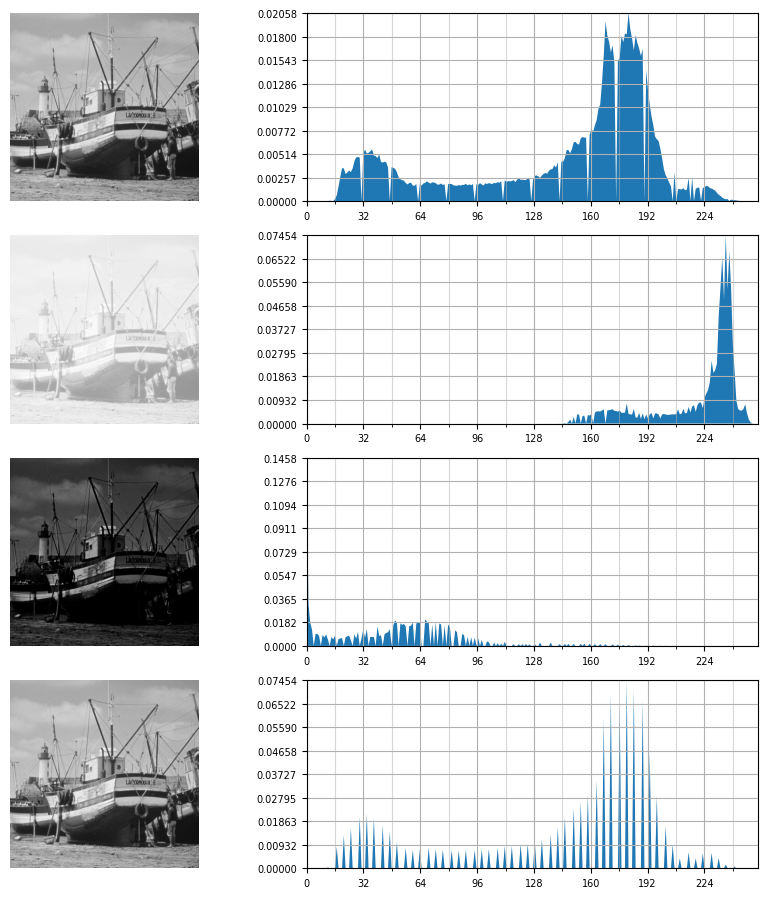

In [8]:
# Figure with 4 rows and 2 columns
fig, ax = plt.subplots(4, 2, figsize=(9, 9))
for i, img in enumerate(img_alarg_list):
    # Plot the image
    img_ = ax[i, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    ax[i, 0].axis('off')
    
    # Compute the normalized histogram
    hist, bins = np.histogram(img, bins=256, range=(0, 255))
    hist_norm = hist / (img.shape[0] * img.shape[1])

    # Plot the histogram
    ch_ = ax[i, 1].fill_between(bins[:-1], hist_norm)
    ax[i, 1].autoscale(enable=True, axis='both', tight=True)
    ax[i, 1].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i, 1].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
    #ax[i, 1].set_aspect('equal')
    ax[i, 1].grid(which='major', alpha=1.0)
    ax[i, 1].grid(which='minor', alpha=0.5)
    ax[i, 1].set_ylim(0, hist_norm.max())
    
plt.tight_layout()
plt.show()

### From manually defined control points

* Contrast stretching from manually defined control points values.

In [9]:
# Bright imagem
img_clara_alarg = exposure.rescale_intensity(img_gray_bright, in_range=((255 * 0.5), 255), out_range=(0, 255))

# Dark imagem
img_escura_alarg = exposure.rescale_intensity(img_gray_dark, in_range=(0, (255 * 0.5)), out_range=(0, 255))

# Low contrast image
img_baixo_alarg = exposure.rescale_intensity(img_gray_low, in_range=((255 * 0.33), (255 * 0.66)), out_range=(0, 255))

img_alarg2_list = [img_clara_alarg, img_escura_alarg, img_baixo_alarg]

### Plotting the images and histograms

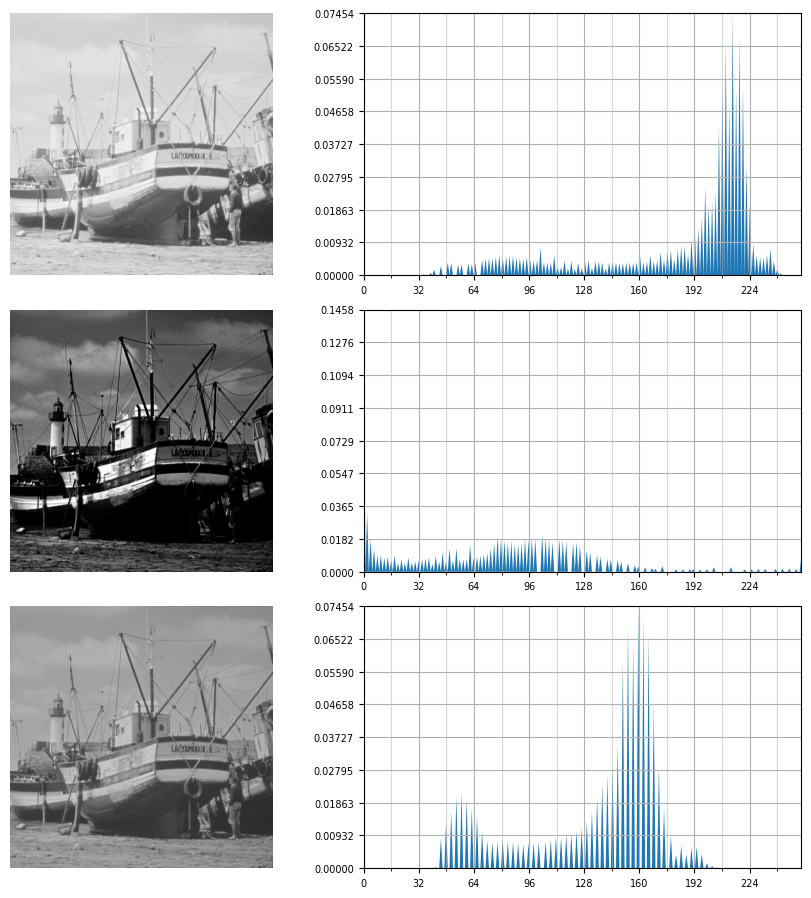

In [10]:
# Figure with 4 rows and 2 columns
fig, ax = plt.subplots(3, 2, figsize=(9, 9))
for i, img in enumerate(img_alarg2_list):
    # Ploting the image
    img_ = ax[i, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    ax[i, 0].axis('off')
    
    # Computing the normalized histogram
    hist, bins = np.histogram(img, bins=256, range=(0, 255))
    hist_norm = hist / (img.shape[0] * img.shape[1])

    # Plot the histogram
    ch_ = ax[i, 1].fill_between(bins[:-1], hist_norm)
    ax[i, 1].autoscale(enable=True, axis='both', tight=True)
    ax[i, 1].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i, 1].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
    #ax[i, 1].set_aspect('equal')
    ax[i, 1].grid(which='major', alpha=1.0)
    ax[i, 1].grid(which='minor', alpha=0.5)
    ax[i, 1].set_ylim(0, hist_norm.max())
    
plt.tight_layout()
plt.show()

## Histogram equalization
---

In [11]:
# ========================================
# SELECT THE IMAGE
# ========================================
## img_gray_ = img_gray
## img_gray_ = img_gray_bright
## img_gray_ = img_gray_dark
img_gray_ = img_gray_low

print(img_gray_.dtype, img_gray_.min(), img_gray_.max())

uint8 95 154


### From scratch implementation

* Gets the piecewise linear transformation function

In [12]:
# Normalized histogram
img_hist, img_hist_bins = exposure.histogram(img_gray_, source_range='dtype', normalize=True)

# Cumulative histogram
# Note: Use the NumPy method. The scikit-image method does not cover the entire range of the data type.
#       Ex.: [0, 255] for uint8.
### img_hist_cum, img_hist_cum_bins = exposure.cumulative_distribution(img_gray_)
img_hist_cum = np.cumsum(img_hist)

# Transformation function
transf_func = np.around(255 * img_hist_cum).astype(np.uint8)
# print(transf_func)
# print(np.unique(img_gray_))

#### Apply the transformation function over the image

In [13]:
img_eq = np.zeros(img_gray_.shape, dtype=img_gray_.dtype)

for rr, ss in zip(r, transf_func):
    img_eq[img_gray_==rr] = ss   
    
# Calculates the normalized histogram of the image after histogram equalization
img_eq_hist, img_eq_hist_bins = exposure.histogram(img_eq, source_range='dtype', normalize=True)

#### Plotando as imagens

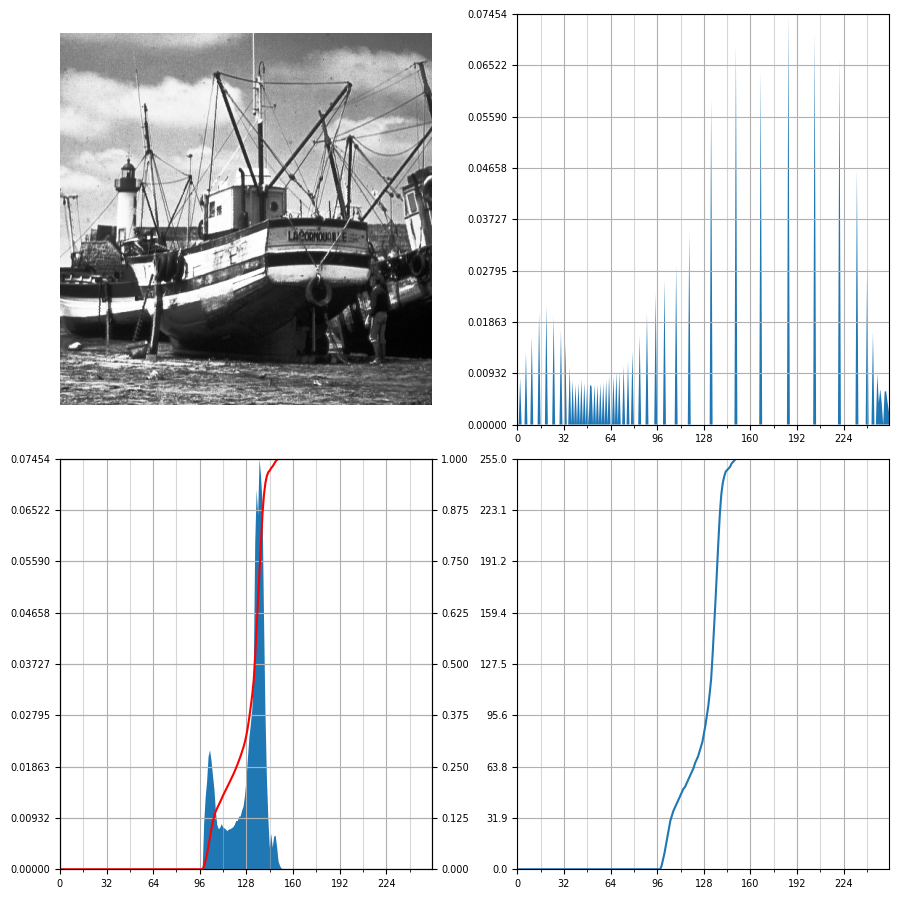

In [14]:
fig, ((ax1, ax5), (ax2, ax3)) = plt.subplots(2, 2, figsize=(9,9))
# Plot the original image
img_ = ax1.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')

ax4 = ax2.twinx()

# Plot the histogram
ch_1 = ax2.fill_between(img_hist_bins, img_hist)

ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_xticks(np.arange(0, 256, 32), minor=False)
ax2.set_xticks(np.arange(0, 256, 16), minor=True)
ax2.set_yticks(np.arange(0, img_hist.max()+0.01, img_hist.max()/8), minor=False)
ax2.set_yticks(np.arange(0, img_hist.max()+0.01, img_hist.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, img_hist.max())

ch_2 = ax4.plot(img_hist_bins, img_hist_cum, c='r')
ax4.autoscale(enable=True, axis='both', tight=True)
ax4.set_xticks(np.arange(0, 256, 32), minor=False)
ax4.set_xticks(np.arange(0, 256, 16), minor=True)
ax4.set_yticks(np.arange(0, img_hist_cum.max()+0.01, img_hist_cum.max()/8), minor=False)
ax4.set_yticks(np.arange(0, img_hist_cum.max()+0.01, img_hist_cum.max()/4), minor=True)
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, img_hist_cum.max())

ch_3 = ax3.plot(img_hist_bins, transf_func)
ax3.autoscale(enable=True, axis='both', tight=True)
ax3.set_xticks(np.arange(0, 256, 32), minor=False)
ax3.set_xticks(np.arange(0, 256, 16), minor=True)
ax3.set_yticks(np.arange(0, transf_func.max()+0.01, transf_func.max()/8), minor=False)
ax3.set_yticks(np.arange(0, transf_func.max()+0.01, transf_func.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax3.grid(which='major', alpha=1.0)
ax3.grid(which='minor', alpha=0.5)
ax3.set_ylim(0, transf_func.max())

ch_4 = ax5.fill_between(img_eq_hist_bins, img_eq_hist)
ax5.autoscale(enable=True, axis='both', tight=True)
ax5.set_xticks(np.arange(0, 256, 32), minor=False)
ax5.set_xticks(np.arange(0, 256, 16), minor=True)
ax5.set_yticks(np.arange(0, img_eq_hist.max()+0.01, img_eq_hist.max()/8), minor=False)
ax5.set_yticks(np.arange(0, img_eq_hist.max()+0.01, img_eq_hist.max()/4), minor=True)
ax5.grid(which='major', alpha=1.0)
ax5.grid(which='minor', alpha=0.5)
ax5.set_ylim(0, img_eq_hist.max())

plt.tight_layout()
plt.show()

### Histogram equalization (scikit-image)

In [15]:
img_gray_list = [img_gray, img_gray_bright, img_gray_dark, img_gray_low]

In [16]:
img_eq_list = []

for img in img_gray_list:
    # https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist
    img_eq = util.img_as_ubyte(exposure.equalize_hist(img))
    
    img_eq_list.append(img_eq)

* Plot information about images

In [17]:
for img in img_eq_list:
    print(img.shape, img.dtype, img.min(), img.max())

(512, 512) uint8 0 255
(512, 512) uint8 0 255
(512, 512) uint8 37 255
(512, 512) uint8 0 255


#### Plotting the images

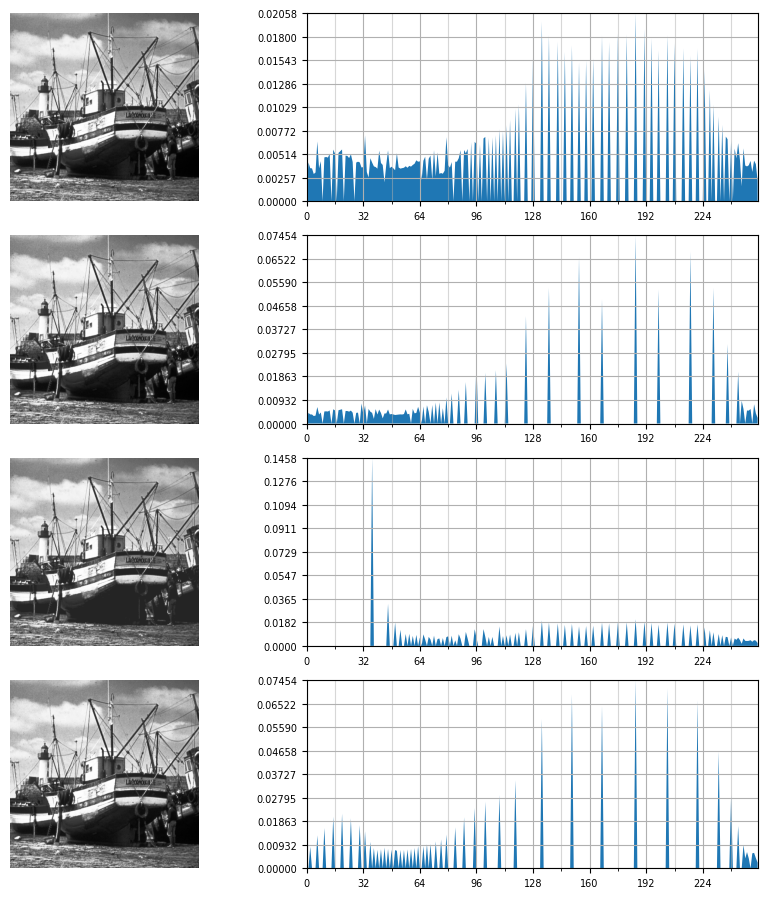

In [18]:
# Figure with 4 rows and 2 columns
fig, ax = plt.subplots(4, 2, figsize=(9, 9))
for i, img in enumerate(img_eq_list):
    # Plot the image
    img_ = ax[i, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    ax[i, 0].axis('off')
    
    # Compute the normalized histogram
    img_eq_hist, img_eq_hist_bins = exposure.histogram(img, source_range='dtype', normalize=True)

    # Plot the histogram
    ch_ = ax[i, 1].fill_between(img_eq_hist_bins, img_eq_hist)
    ax[i, 1].autoscale(enable=True, axis='both', tight=True)
    ax[i, 1].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i, 1].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i, 1].set_yticks(np.arange(0, img_eq_hist.max()+0.01, img_eq_hist.max()/8), minor=False)
    ax[i, 1].set_yticks(np.arange(0, img_eq_hist.max()+0.01, img_eq_hist.max()/4), minor=True)
    #ax[i, 1].set_aspect('equal')
    ax[i, 1].grid(which='major', alpha=1.0)
    ax[i, 1].grid(which='minor', alpha=0.5)
    ax[i, 1].set_ylim(0, img_eq_hist.max())
    
plt.tight_layout()
plt.show()

## Bibliography
---

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* scikit-image. Documentação. Module 'exposure'.
    * https://scikit-image.org/docs/dev/api/skimage.exposure.html
* scikit-image. Gamma and log contrast adjustment.
    * https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_log_gamma.html
* scikit-image. Histogram Equalization.
    * https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html
* scikit-image. Local Histogram Equalization
    * https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_local_equalize.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/